### Import Libraries

In [108]:
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- **Version Check**

In [2]:
print(tf.__version__)

2.16.2


<!-- -->

### Basics

#### Tensor Constant 
    - `tf.Tensor are immutable objects`. 
    - Mostly it is used for input data during Model training
Note: In Tensorflow n-dimensional array is known and stored as Tensor object like below. 

In [3]:
# col1, col2, col3
x = tf.constant([[10., 20., 30.], # row1
                [40., 50., 60]] # row2
                )

print(type(x)) # n-dimensional array stored as internal tensor object
print(x)
print(x.shape)
print(x.dtype)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


- **Mathematical Operations**

In [4]:
# Adding n-dimensional tensor with same values 
x_add = x + x

print(x_add)
print(x_add.shape)

tf.Tensor(
[[ 20.  40.  60.]
 [ 80. 100. 120.]], shape=(2, 3), dtype=float32)
(2, 3)


In [5]:
# Multiplying n-dimensional tensor with constant value
x_ml_c = x * 5

print(x_ml_c)
print(x_ml_c.shape)

tf.Tensor(
[[ 50. 100. 150.]
 [200. 250. 300.]], shape=(2, 3), dtype=float32)
(2, 3)


In [6]:
# Dot product of n-dimensional tensor with same values i.e., matrix multiplication --> sum(row * column)
x_dot_product = x @ tf.transpose(x)

print(x)
print(tf.transpose(x))
print(x_dot_product, "\n\n")
print("Dot Product / Matrix Multiplication")
print(x_dot_product.shape, "\n\n")

# Explanation of matrix matrix multiplication
print("Explanation of matrix matrix multiplication")
print("x[00]position:", (10.*10.) + (20.*20.) + (30.*30.))
print("x[01]position:", (10.*40.) + (20.*50.) + (30.*60.))
print("x[10]position:", (40.*10.) + (50.*20.) + (60.*30.))
print("x[11]position:", (40.*40.) + (50.*50.) + (60.*60.))

tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[10. 40.]
 [20. 50.]
 [30. 60.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[1400. 3200.]
 [3200. 7700.]], shape=(2, 2), dtype=float32) 


Dot Product / Matrix Multiplication
(2, 2) 


Explanation of matrix matrix multiplication
x[00]position: 1400.0
x[01]position: 3200.0
x[10]position: 3200.0
x[11]position: 7700.0


In [7]:
# Data Concat
x_concat = tf.concat([x,x], axis=0) # Row wise addition

print(x.shape)
print(x)
print(x_concat.shape)
print(x_concat)

(2, 3)
tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]], shape=(2, 3), dtype=float32)
(4, 3)
tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]
 [10. 20. 30.]
 [40. 50. 60.]], shape=(4, 3), dtype=float32)


In [8]:
# Converting raw values into softmax values
x_soft_max_values = tf.nn.softmax(x, axis=-1)

print(x.shape)
print(x)
print(x_soft_max_values.shape)
print(x_soft_max_values)

(2, 3)
tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]], shape=(2, 3), dtype=float32)
(2, 3)
tf.Tensor(
[[2.0610598e-09 4.5397872e-05 9.9995458e-01]
 [2.0610598e-09 4.5397872e-05 9.9995458e-01]], shape=(2, 3), dtype=float32)


In [9]:
# Sum all the elements in tensor array : 10+20+30+40+50+60
x_sum = tf.reduce_sum(x)

print(x.shape)
print(x)
print(x_sum.shape)
print(x_sum)

(2, 3)
tf.Tensor(
[[10. 20. 30.]
 [40. 50. 60.]], shape=(2, 3), dtype=float32)
()
tf.Tensor(210.0, shape=(), dtype=float32)


In [10]:
# Convert array to tensor object
x_temp = tf.convert_to_tensor([1,2,3]) # One row with 3 cols

print(x_temp.shape)
print(x_temp)


(3,)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [11]:
# Sum elements from array instead of tensor object
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [12]:
# Check whether TF currently using CPU/GPU: For higher performance use GPU, if exists on Computer which we are using.
if tf.config.list_physical_devices("GPU"):
    print("TensorFlow using GPU")
else:
    print("Tensorflow using CPU")

Tensorflow using CPU


<!--  -->

#### Tensor: Variable

Note: `As tf.Tensor are immutable. But to store ML Model Weights, we require mutable variables i.e., we use tf.variable`. 

In [13]:
# Intialise with default values
var = tf.Variable([0.0, 0.0, 0.0])

print(var.shape)
print(var)

(3,)
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>


In [14]:
# Update variable with new values
var_new = var.assign([1,2,3])

print(var_new.shape)
print(var_new)

(3,)
<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>


In [128]:
# Simple function f(x) / y = x^2 + 2x - 5 
def f(x):
    return x**2 + 2*x - 5

x = [-5, -2.5, 0, 2.5] # x
y = [f(val) for val in x] # f(x)

print("x: ", x)
print("y/f(x): ", y)

x:  [-5, -2.5, 0, 2.5]
y/f(x):  [10, -3.75, -5, 6.25]


In [129]:
# Define the input tensor x
x = tf.constant([-5.0, -2.5, 0.0, 2.5], dtype=tf.float32)

# Derivative of function f(x) = x^2 + 2x - 5 i.e., dy/dx (or) y' (or) f'(x)
# f(x)=x^2+2x−5 is 𝑓′(𝑥)=2𝑥+2 
# TensorFlow implements automatic differentiation (autodiff), which uses calculus to compute gradients.
with tf.GradientTape() as g:
    g.watch(x)
    y = f(x) # y = 2𝑥+2 i.e., derived derivative of function f(x)

# Compute the gradient of y with respect to x
grad_val = g.gradient(y, x)
print("x: ", x)
print("𝑓′`: ", grad_val)

x:  tf.Tensor([-5.  -2.5  0.   2.5], shape=(4,), dtype=float32)
𝑓′`:  tf.Tensor([-8. -3.  2.  7.], shape=(4,), dtype=float32)


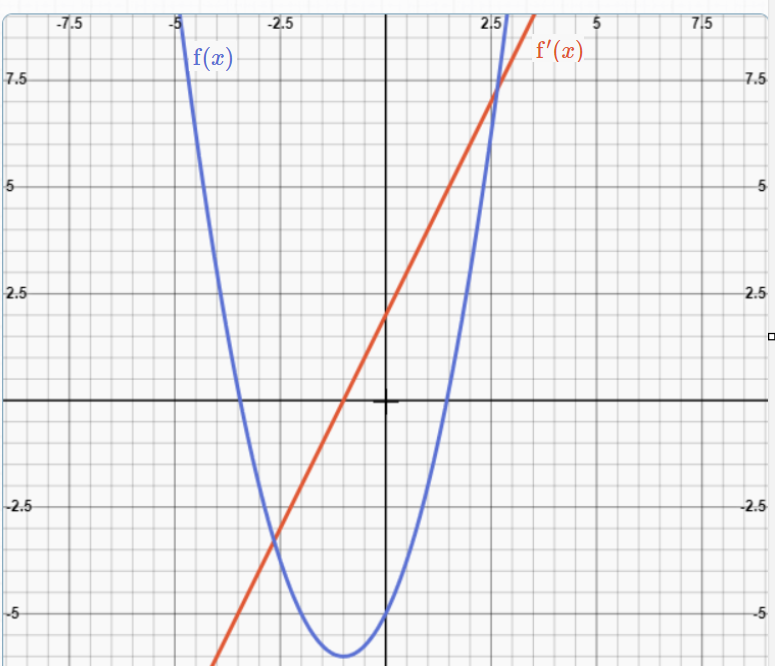

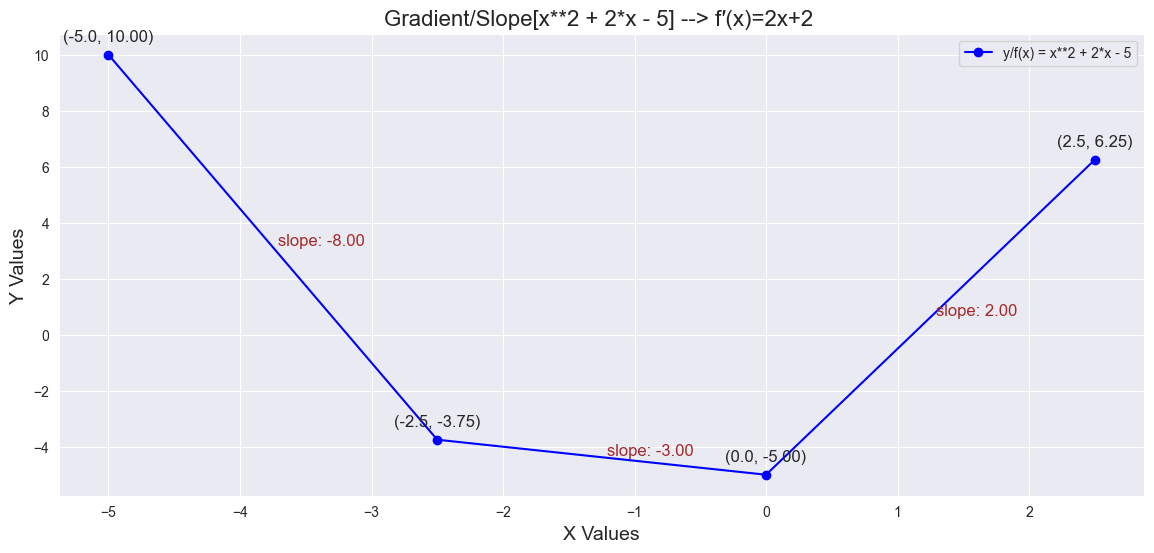

In [157]:
# Plotting the function
sns.set_style("dark")
plt.figure(figsize=(14,6))
# Original function
plt.plot(x.numpy(), y, label='y/f(x) = x**2 + 2*x - 5', marker='o', color='blue')
# plt.plot(x.numpy(), grad_val.numpy(), label='f′(x)=2x+2 ', marker='o', color="orange")
# Annotating the slopes
midpoints_x = (x.numpy()[:-1] + x.numpy()[1:]) / 2
for i in range(len(midpoints_x)):
    plt.annotate(f"slope: {grad_val.numpy()[i]:.2f}", 
                (midpoints_x[i], (y[i] + y[i+1])/2), 
                textcoords="offset points", 
                xytext=(4,10), 
                va='top', 
                color='brown',
                size=12)
# Annotating the points and the slopes
for i, (px, py) in enumerate(zip(x.numpy(), y)):
    plt.annotate(f"({px:.1f}, {py:.2f})", (px, py), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
plt.title("Gradient/Slope[x**2 + 2*x - 5] --> f′(x)=2x+2 ", fontsize=16)
plt.xlabel("X Values", fontsize=14)
plt.ylabel("Y Values", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<!--  -->

#### Tensor: Function

Note: `tf.function is a decorator that automatically optimizes TensorFlow operations for better performance`.

In [26]:
# Tensor operations in simple python function
def add(x,y):
    return x+y

x = tf.constant([10, 20])
y = tf.constant([100, 100])

add(x,y) # Immediate/Eager execution in python function

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([110, 120])>

In [27]:
# Tensor operations in tensor function
@tf.function
def add(x,y):
    return x+y

x = tf.constant([10, 20])
y = tf.constant([100, 100])

add(x,y) # Graph execution is optimized and performed in a graph structure	

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([110, 120])>

<!--  -->

#### Tensor: Module

Note: `tf.Module is a class that encapsulates a collection of variables and methods that operate on them`.

- Benefits
    - You can save and restore the values of your variables using tf.train.Checkpoint. This is useful during training as it is quick to save and restore a model's state.
    - You can import and export the tf.Variable values and the tf.function graphs using tf.saved_model. This allows you to run your model independently of the Python program that created it.

In [32]:
# Tensor Class
class SimplePred(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value) # Mutable Array (tensor obj) for Model weights (Here single weight)

    @tf.function
    def pred(self, x):
        return x * self.weight # Function: input * weight --> output prediction
    
# Load Model Object i.e., Tensor Module Class
model = SimplePred(3) # weight/coefficient
# Prediction function
model.pred(tf.constant([1,2,3])) # Immutae Input Data Array (tensor obj)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [35]:
# Save Path
save_path = os.getcwd()+"\\Data"

# Save Model (Tensor Module Code along with Model weights i.e., tf.Variable = 3)
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: c:\Users\rakes\Local\Git_Repo\DataScienceHub\DeepLearning\Data\assets


INFO:tensorflow:Assets written to: c:\Users\rakes\Local\Git_Repo\DataScienceHub\DeepLearning\Data\assets


In [38]:
# Load Model
loaded_model = tf.saved_model.load(save_path)
pred1 = loaded_model.pred(tf.constant([1, 2, 3])) # Input data : 1,2,3
print("Pred1:", pred1)
pred2 = loaded_model.pred(tf.constant([10, 20, 30])) # Input data : 10,20,30
print("Pred2:", pred2)

Pred1: tf.Tensor([3 6 9], shape=(3,), dtype=int32)
Pred2: tf.Tensor([30 60 90], shape=(3,), dtype=int32)


<!--  -->

#### Tensor: Training Loops
- Basic Model from Scratch using TensorFlow
- Data: Follows Quadtratic Curve

- **Raw Data**

------------------------------------------------------------
Raw Sequentila Data
------------------------------------------------------------
tf.Tensor(
[-2.         -1.94936709 -1.89873418 -1.84810127 -1.79746835 -1.74683544
 -1.69620253 -1.64556962 -1.59493671 -1.5443038  -1.49367089 -1.44303797
 -1.39240506 -1.34177215 -1.29113924 -1.24050633 -1.18987342 -1.13924051
 -1.08860759 -1.03797468 -0.98734177 -0.93670886 -0.88607595 -0.83544304
 -0.78481013 -0.73417722 -0.6835443  -0.63291139 -0.58227848 -0.53164557
 -0.48101266 -0.43037975 -0.37974684 -0.32911392 -0.27848101 -0.2278481
 -0.17721519 -0.12658228 -0.07594937 -0.02531646  0.02531646  0.07594937
  0.12658228  0.17721519  0.2278481   0.27848101  0.32911392  0.37974684
  0.43037975  0.48101266  0.53164557  0.58227848  0.63291139  0.6835443
  0.73417722  0.78481013  0.83544304  0.88607595  0.93670886  0.98734177
  1.03797468  1.08860759  1.13924051  1.18987342  1.24050633  1.29113924
  1.34177215  1.39240506  1.44303797  1.493670

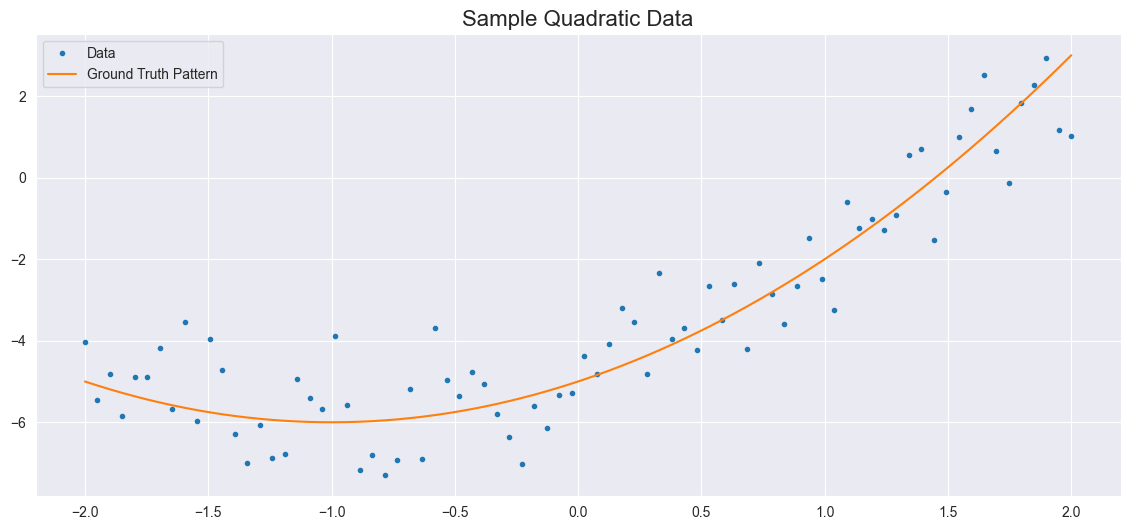

In [125]:
x = tf.linspace(-2, 2, 80) # it generates a sequence of evenly spaced values within a specified interval.
print("--"*30)
print("Raw Sequentila Data")
print("--"*30)
print(x)
# Datatype conversion
x = tf.cast(x, tf.float32) # Reduces to less decimals [float64: higher decimals, flat32: lesser decimals]
print("--"*30)
print("DataType Conversion")
print("--"*30)
print(x)
# Closely Quadratic Function
def f(x):
    y = x**2 + 2*x - 5
    return y

# Adding some normal distributed noise so that data points can be spread across quadratic line i.e., x**2 + 2*x - 5, or else it looks just a without data points above nor below the line
y = f(x) + tf.random.normal(shape=[80]) # tf.random.normal generates data that follows a bell curve, also known as a Gaussian distribution or normal distribution.
print("--"*30)
print("Smoothed Line/Trend")
print("--"*30)
print(y)

# Plot
sns.set_style("dark")
plt.figure(figsize=(14,6))
plt.plot(x.numpy(), y.numpy(), '.', label="Data")
plt.plot(x.numpy(), f(x), label="Ground Truth Pattern")
plt.title("Sample Quadratic Data", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

- **Quadratic Model**
    - Randomised weights & bias

quadratic weight: 2.359447956085205, linear weight: 4.384638786315918, bias: 4.613941192626953


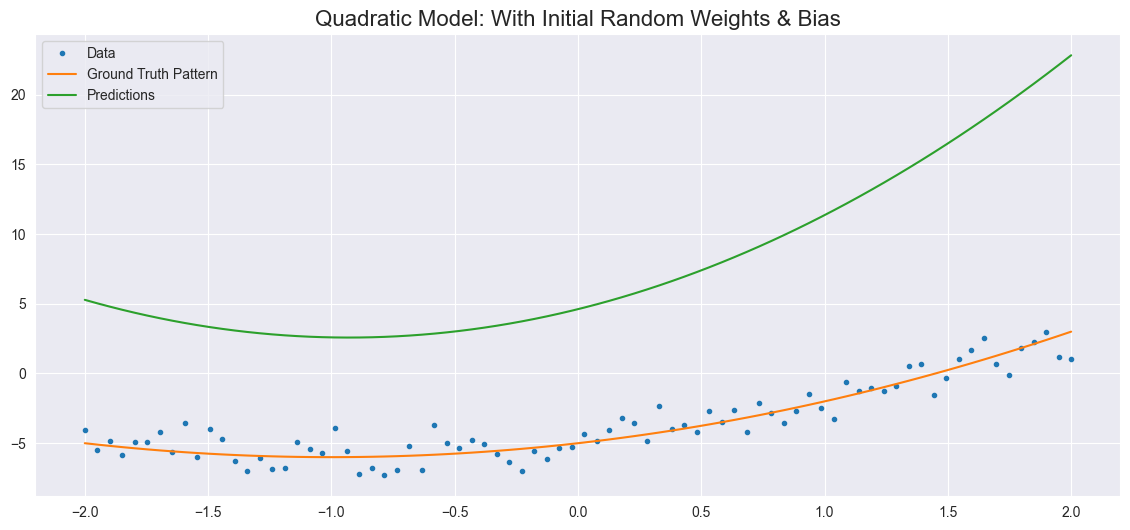

In [126]:
# Randomised weights & bias
class QuadraticModel(tf.Module):
    def __init__(self):
        # Randomised weights
        rand_init = tf.random.uniform(shape=[3], minval=0.0, maxval=5.0, seed=101) # uniform values between 0 and 5 i.e., equal chance of getting all values between 0 and 5
        # Initialise weights
        self.weight_q = tf.Variable(rand_init[0]) # Coefficient for quadratic term
        self.weight_l = tf.Variable(rand_init[1]) # Coefficient for linear term for Predictor
        self.bias = tf.Variable(rand_init[2])
        print(f"quadratic weight: {rand_init[0]}, linear weight: {rand_init[1]}, bias: {rand_init[2]}")

    @tf.function
    def predict(self,x):
        # Quadratic model with random weights & bias: quadratic_weight * x^2 + linear_weight * x + bias
        return self.weight_q * (x**2) + self.weight_l * x + self.bias
    
# Initiate Model Object
model = QuadraticModel()

# Plot Prediction
def plot_preds(x, y, f, model, title):
    sns.set_style("dark")
    plt.figure(figsize=(14,6))
    plt.plot(x, y.numpy(), '.', label="Data")
    plt.plot(x, f(x), label="Ground Truth Pattern")
    plt.plot(x, model.predict(x), label="Predictions")
    plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_preds(x, y, f, model, 'Quadratic Model: With Initial Random Weights & Bias')

quadratic weight: 0.9, linear weight: 2.2, bias: -4.5
Prediction: Tensor("add_1:0", shape=(80,), dtype=float32)


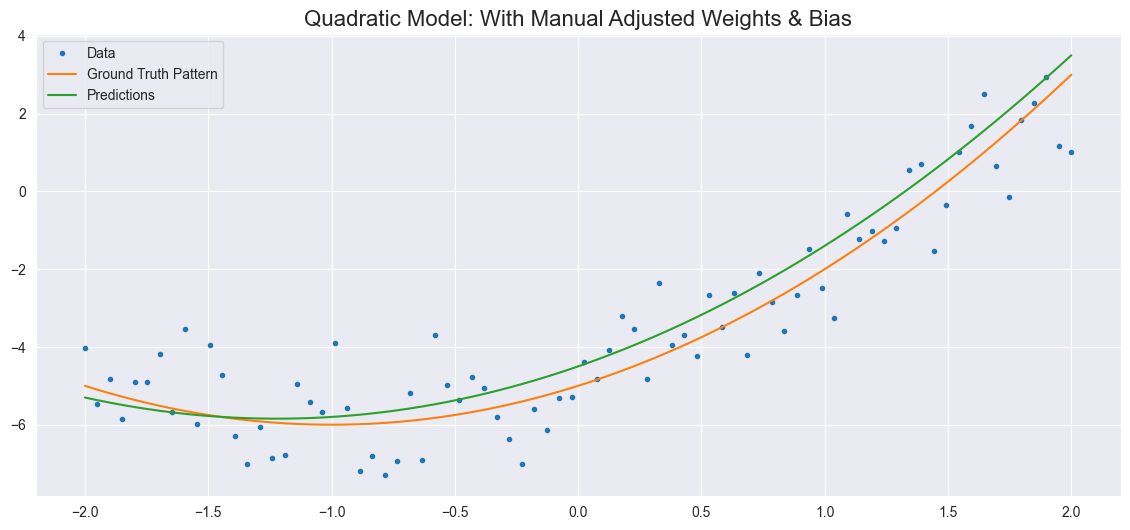

In [127]:
# Randomised weights & bias
class QuadraticModel(tf.Module):
    def __init__(self, w_q, w_l, b):
        # Initialise weights
        self.weight_q = tf.Variable(w_q) # Coefficient for quadratic term
        self.weight_l = tf.Variable(w_l) # Coefficient for linear term for Predictor
        self.bias = tf.Variable(b)
        print(f"quadratic weight: {w_q}, linear weight: {w_l}, bias: {b}")

    @tf.function
    def predict(self,x):
        # Quadratic model with random weights & bias: quadratic_weight * x^2 + linear_weight * x + bias
        pred = self.weight_q * (x**2) + self.weight_l * x + self.bias
        print(f"Prediction: {pred}")
        return pred
    
# Initiate Model Object
model = QuadraticModel(.9, 2.2, -4.5) # Manual Adjusted Weights and Bias

# Plot Prediction
def plot_preds(x, y, f, model, title):
    sns.set_style("dark")
    plt.figure(figsize=(14,6))
    plt.plot(x, y.numpy(), '.', label="Data")
    plt.plot(x, f(x), label="Ground Truth Pattern")
    plt.plot(x, model.predict(x), label="Predictions")
    plt.title(title, fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_preds(x, y, f, model, 'Quadratic Model: With Manual Adjusted Weights & Bias')